In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_train_data=pd.read_csv('train.csv')
raw_test_data=pd.read_csv('test.csv')

In [3]:
raw_train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
raw_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
raw_train_data.shape,raw_test_data.shape

((1460, 81), (1459, 80))

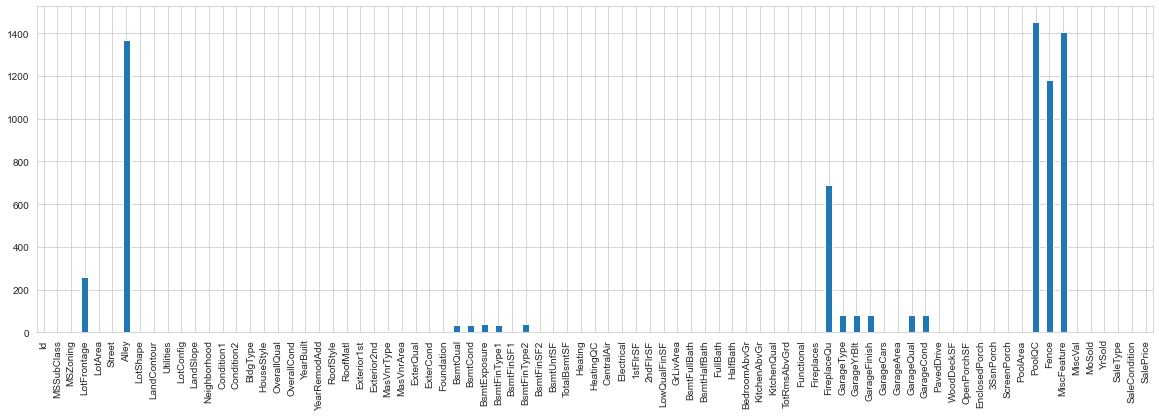

In [6]:
plt.figure(figsize=(20,6))
raw_train_data.isnull().sum().plot.bar()

We will check for features having 80% more null values and then remove it.

In [7]:
raw_train_data.isnull().sum()[raw_train_data.isnull().sum()/raw_train_data.shape[0]*100>=80]

Alley          1369
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [8]:
raw_test_data.isnull().sum()[raw_test_data.isnull().sum()/raw_test_data.shape[0]*100>=80]

Alley          1352
PoolQC         1456
Fence          1169
MiscFeature    1408
dtype: int64

These are the features having more than 80% of null values

In [9]:
train_data=raw_train_data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)
test_data=raw_test_data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)


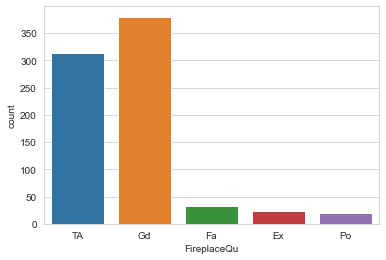

In [10]:
sns.countplot(train_data['FireplaceQu'])

In [11]:
train_data[train_data['FireplaceQu'].isnull()]['FireplaceQu']

0       NaN
5       NaN
10      NaN
12      NaN
15      NaN
       ... 
1452    NaN
1453    NaN
1454    NaN
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 690, dtype: object

In [12]:
train_data['FireplaceQu']=train_data['FireplaceQu'].fillna('NA')
test_data['FireplaceQu']=test_data['FireplaceQu'].fillna('NA')

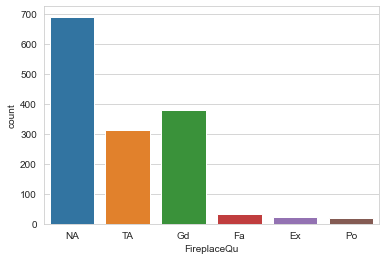

In [13]:
sns.countplot(train_data['FireplaceQu'])

In [14]:
train_data['FireplaceQu'].value_counts()/train_data.shape[0]*100

NA    47.260274
Gd    26.027397
TA    21.438356
Fa     2.260274
Ex     1.643836
Po     1.369863
Name: FireplaceQu, dtype: float64

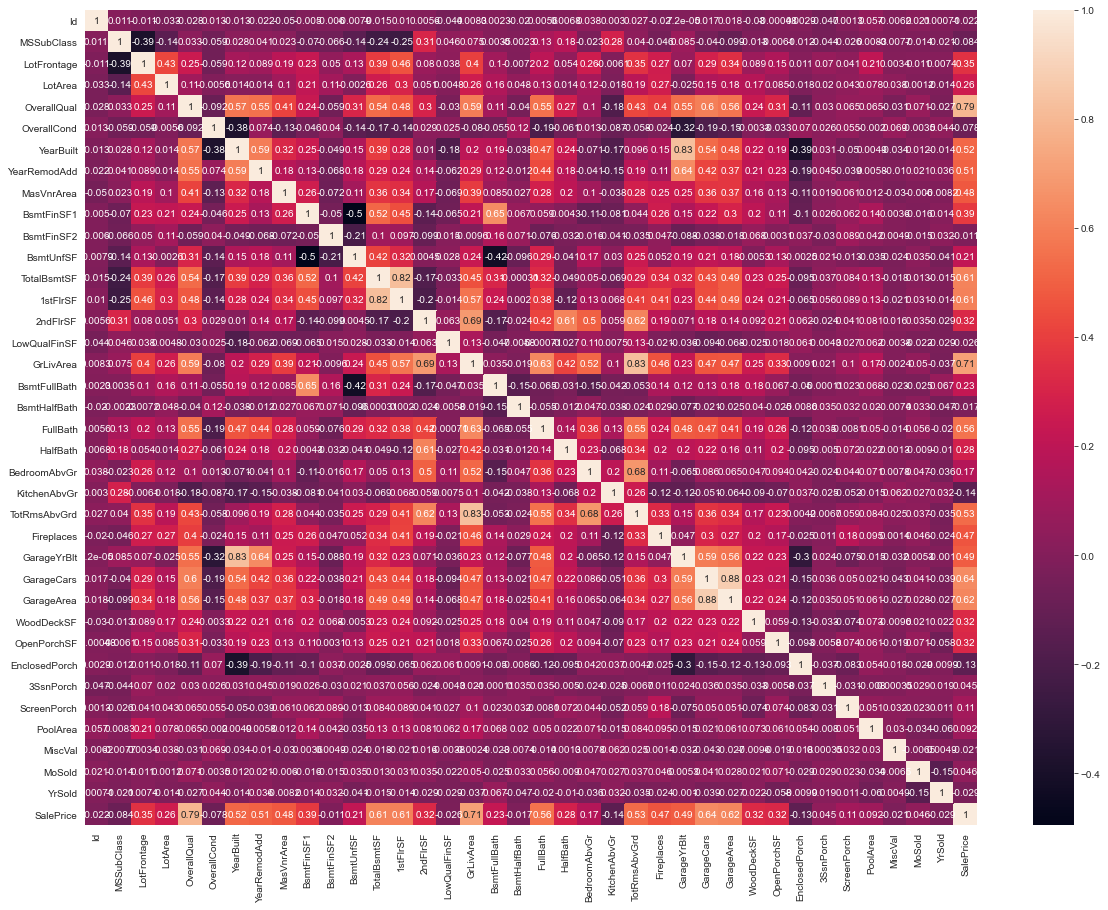

In [15]:
plt.figure(figsize=(20,15))
sns.heatmap(train_data.corr(),annot=True)

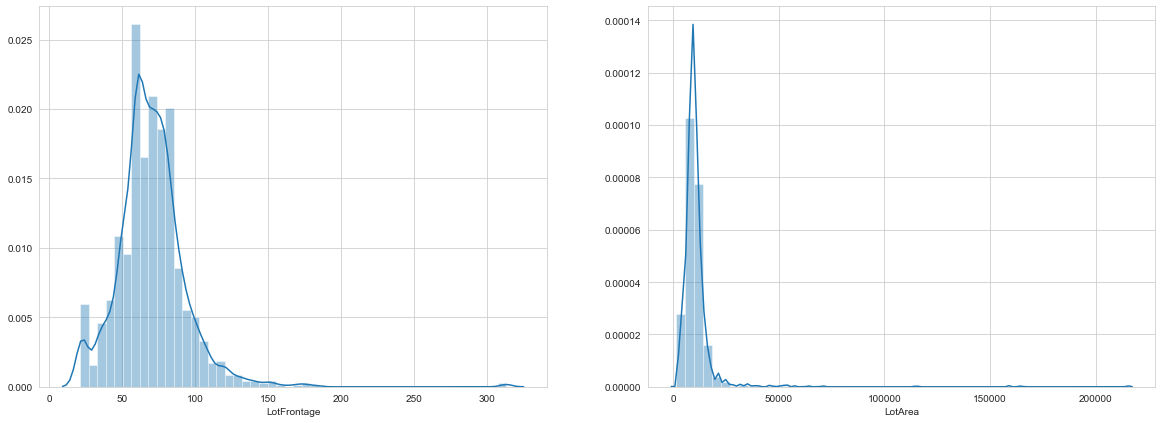

In [16]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.distplot(train_data['LotFrontage'])
plt.subplot(1,2,2)
sns.distplot(train_data['LotArea'])

Appending the Lot Frontage according to the Lot Area. By using linear interpolation method.

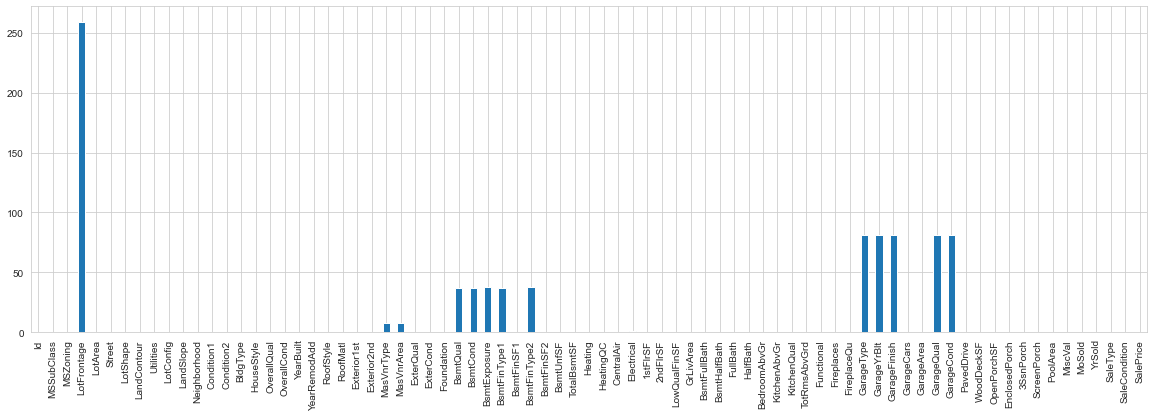

In [17]:
plt.figure(figsize=(20,6))
train_data.isna().sum().plot.bar()             

Text(0.5, 0, 'Lot Area')

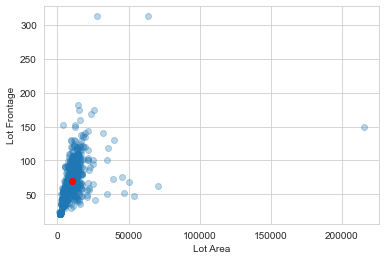

In [18]:
plt.scatter(train_data['LotArea'],train_data['LotFrontage'],alpha=0.3)
plt.scatter(train_data['LotArea'].mean(),train_data['LotFrontage'].mean(),color='red')
plt.ylabel('Lot Frontage')
plt.xlabel('Lot Area')

As Lot Area increases Lot Frontage increases.
Thus we will fill lot frontage wrt lot area.

In [19]:
np.round(train_data['LotFrontage'].mean(),2),np.round(train_data['LotArea'].mean(),2)

(70.05, 10516.83)

In [20]:
lot_na=train_data[train_data['LotFrontage'].isna()].index

In [21]:
lot_na.shape

(259,)

In [22]:
new_list=[]
for i in range(lot_na.shape[0]):
    train_data['LotFrontage']=70.05*train_data['LotArea'][i]/10516.83
   

In [23]:
train_data['LotFrontage'].isna().sum(),train_data.shape

(0, (1460, 77))

In [24]:
lot_na_test=test_data[test_data['LotFrontage'].isna()].index
lot_na_test.shape

(227,)

In [25]:
for i in range(lot_na_test.shape[0]):
    test_data['LotFrontage']=70.05*test_data['LotArea'][i]/10516.83

In [26]:
test_data.shape

(1459, 76)

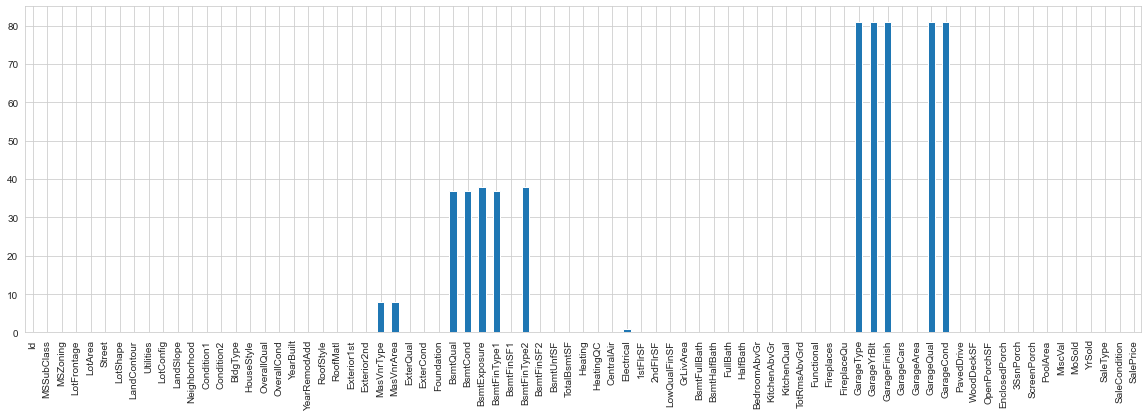

In [27]:
plt.figure(figsize=(20,6))
train_data.isna().sum().plot.bar()             

In [28]:
train_data.loc[:,'GarageType':'GarageCond'][train_data['GarageType'].isnull()]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...,...
1349,NaN,NaN,NaN,0,0,NaN,NaN
1407,NaN,NaN,NaN,0,0,NaN,NaN
1449,NaN,NaN,NaN,0,0,NaN,NaN
1450,NaN,NaN,NaN,0,0,NaN,NaN


The above figures shows that there is no garage space so the data are blank

In [29]:
train_data.loc[:,'GarageType':'GarageCond']=train_data.loc[:,'GarageType':'GarageCond'].fillna(0)
test_data.loc[:,'GarageType':'GarageCond']=test_data.loc[:,'GarageType':'GarageCond'].fillna(0)


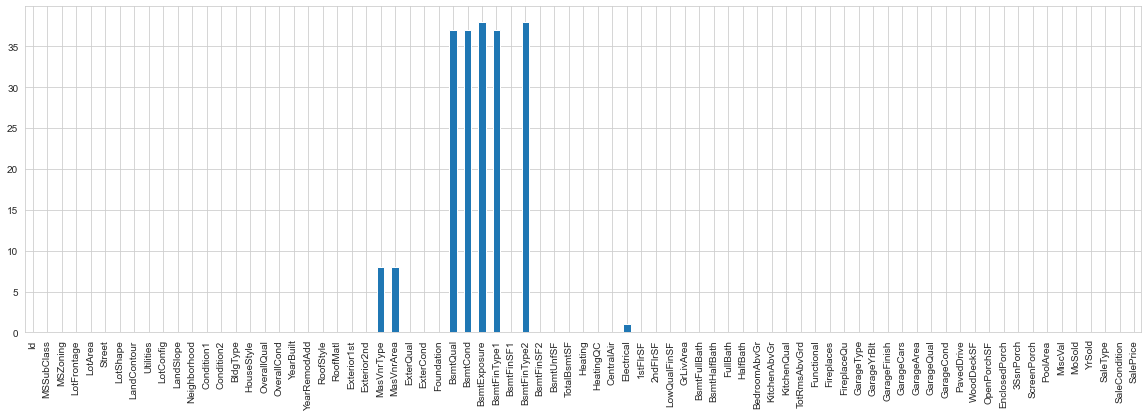

In [30]:
plt.figure(figsize=(20,6))
train_data.isna().sum().plot.bar() 

In [31]:
train_data.loc[:,'BsmtQual':'BsmtFinSF2'][train_data['BsmtQual'].isnull()]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2
17,NaN,NaN,NaN,NaN,0,NaN,0
39,NaN,NaN,NaN,NaN,0,NaN,0
90,NaN,NaN,NaN,NaN,0,NaN,0
102,NaN,NaN,NaN,NaN,0,NaN,0
156,NaN,NaN,NaN,NaN,0,NaN,0
182,NaN,NaN,NaN,NaN,0,NaN,0
259,NaN,NaN,NaN,NaN,0,NaN,0
342,NaN,NaN,NaN,NaN,0,NaN,0
362,NaN,NaN,NaN,NaN,0,NaN,0
371,NaN,NaN,NaN,NaN,0,NaN,0


In [32]:
train_data.loc[:,'BsmtQual':'BsmtFinSF2']=train_data.loc[:,'BsmtQual':'BsmtFinSF2'].fillna(0)
test_data.loc[:,'BsmtQual':'BsmtFinSF2']=test_data.loc[:,'BsmtQual':'BsmtFinSF2'].fillna(0)

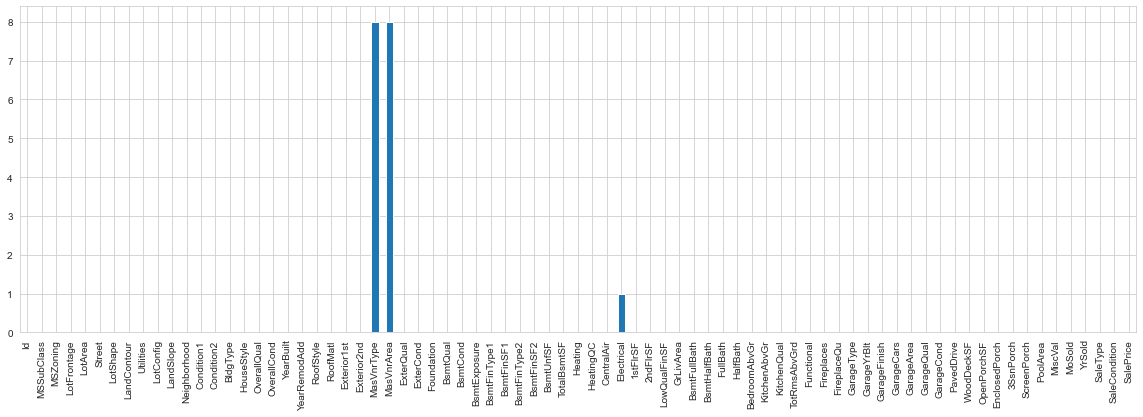

In [33]:
plt.figure(figsize=(20,6))
train_data.isna().sum().plot.bar() 

In [34]:
train_data.loc[:,'MasVnrType':'MasVnrArea'][train_data['MasVnrType'].isnull()]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [35]:
train_data['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [36]:
test_data.loc[:,'MasVnrType':'MasVnrArea'][test_data['MasVnrType'].isnull()],train_data.loc[:,'MasVnrType':'MasVnrArea'][train_data['MasVnrType'].isnull()]

(     MasVnrType  MasVnrArea
 231         NaN         NaN
 246         NaN         NaN
 422         NaN         NaN
 532         NaN         NaN
 544         NaN         NaN
 581         NaN         NaN
 851         NaN         NaN
 865         NaN         NaN
 880         NaN         NaN
 889         NaN         NaN
 908         NaN         NaN
 1132        NaN         NaN
 1150        NaN       198.0
 1197        NaN         NaN
 1226        NaN         NaN
 1402        NaN         NaN,
      MasVnrType  MasVnrArea
 234         NaN         NaN
 529         NaN         NaN
 650         NaN         NaN
 936         NaN         NaN
 973         NaN         NaN
 977         NaN         NaN
 1243        NaN         NaN
 1278        NaN         NaN)

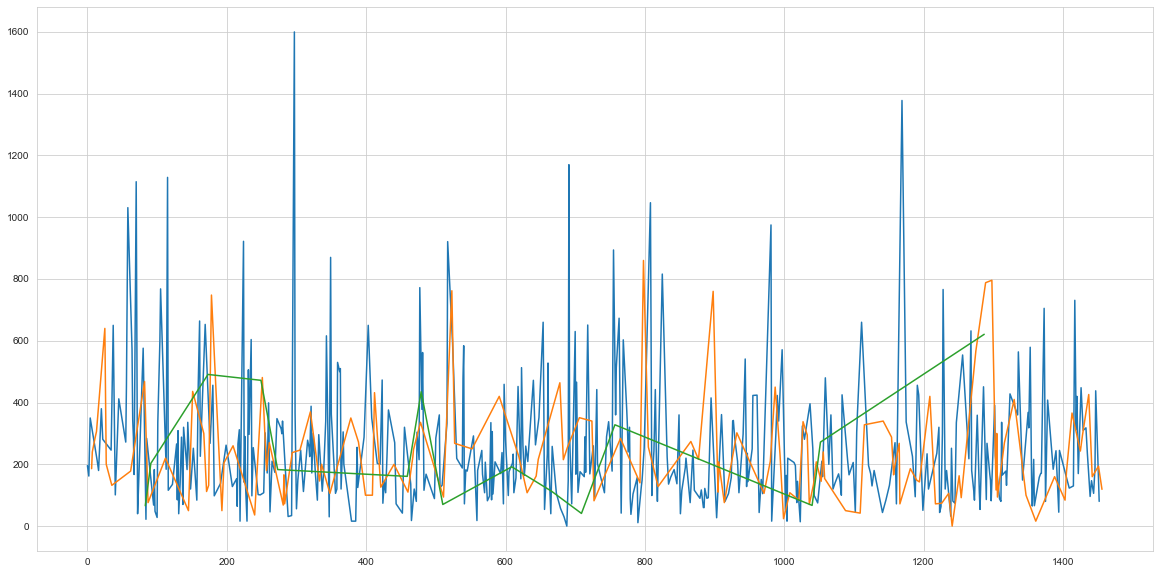

In [37]:
plt.figure(figsize=(20,10))
train_data[train_data['MasVnrType']=='BrkFace']['MasVnrArea'].plot()
train_data[train_data['MasVnrType']=='Stone']['MasVnrArea'].plot()
train_data[train_data['MasVnrType']=='BrkCmn']['MasVnrArea'].plot()


In [38]:
test_data.iloc[1150,:]=test_data.iloc[1150,:].fillna('BrkFace')

In [39]:
test_data.loc[:,'MasVnrType']=test_data.loc[:,'MasVnrType'].fillna('None')

In [40]:
test_data.loc[:,'MasVnrArea']=test_data.loc[:,'MasVnrArea'].fillna(0)

In [41]:
train_data.loc[:,'MasVnrType']=train_data.loc[:,'MasVnrType'].fillna('None')
train_data.loc[:,'MasVnrArea']=train_data.loc[:,'MasVnrArea'].fillna(0)

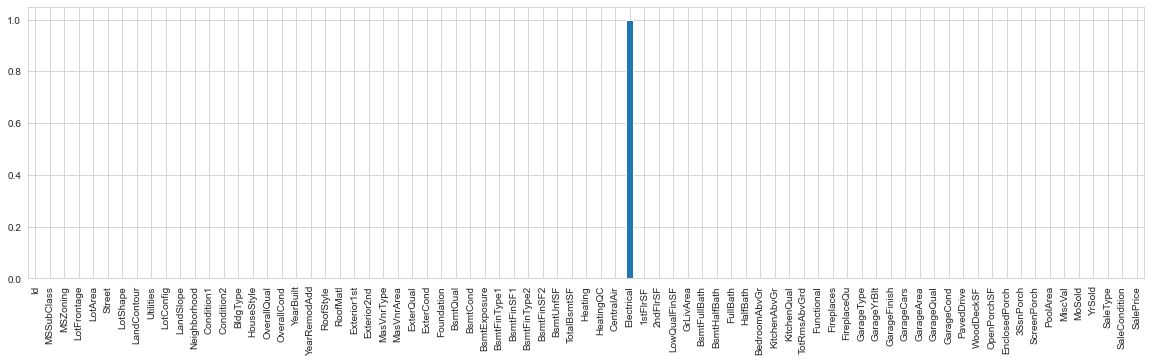

In [42]:
plt.figure(figsize=(20,5))
train_data.isna().sum().plot(kind='bar')

In [43]:
train_data['Electrical'].value_counts(),test_data['Electrical'].value_counts()

(SBrkr    1334
 FuseA      94
 FuseF      27
 FuseP       3
 Mix         1
 Name: Electrical, dtype: int64,
 SBrkr    1337
 FuseA      94
 FuseF      23
 FuseP       5
 Name: Electrical, dtype: int64)

In [44]:
train_data['Electrical']=train_data['Electrical'].fillna('SBrkr')

In [45]:
test_data['Electrical']=test_data['Electrical'].fillna('SBrkr')

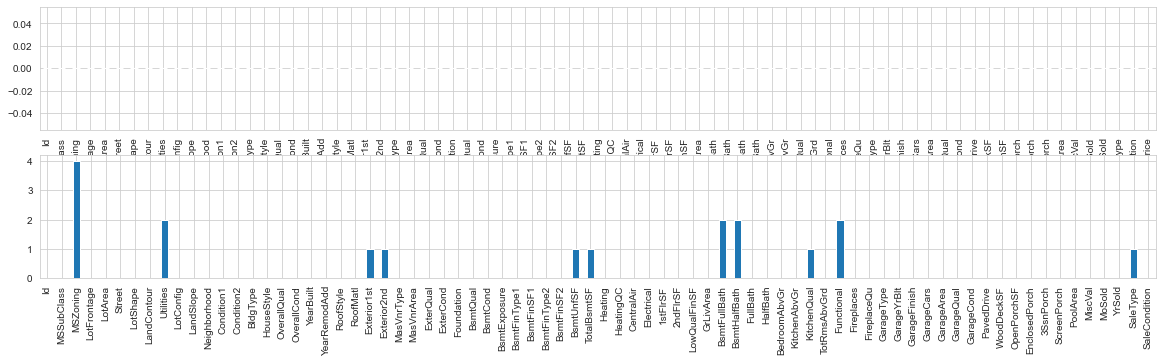

In [46]:
plt.figure(figsize=(20,5))
plt.subplot(2,1,1)
train_data.isna().sum().plot(kind='bar')
plt.subplot(2,1,2)
test_data.isna().sum().plot(kind='bar')

In [47]:
test_data['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [48]:
test_data['MSZoning']=test_data['MSZoning'].fillna('RL')

In [49]:
test_data['Utilities'].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [50]:
test_data['Utilities']=test_data['Utilities'].fillna('AllPub')

In [51]:
test_data['Exterior1st'].value_counts(),test_data['Exterior2nd'].value_counts()

(VinylSd    510
 MetalSd    230
 HdBoard    220
 Wd Sdng    205
 Plywood    113
 CemntBd     65
 BrkFace     37
 WdShing     30
 AsbShng     24
 Stucco      18
 BrkComm      4
 AsphShn      1
 CBlock       1
 Name: Exterior1st, dtype: int64,
 VinylSd    510
 MetalSd    233
 HdBoard    199
 Wd Sdng    194
 Plywood    128
 CmentBd     66
 Wd Shng     43
 BrkFace     22
 Stucco      21
 AsbShng     18
 Brk Cmn     15
 ImStucc      5
 CBlock       2
 AsphShn      1
 Stone        1
 Name: Exterior2nd, dtype: int64)

In [52]:
test_data['Exterior1st']=test_data['Exterior1st'].fillna('VinylSd')
test_data['Exterior2nd']=test_data['Exterior2nd'].fillna('VinylSd')

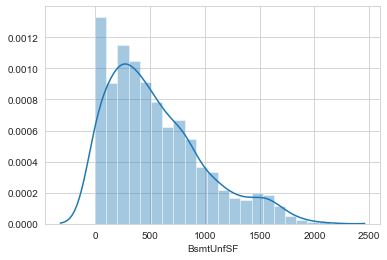

In [53]:
sns.distplot(test_data['BsmtUnfSF'])

In [54]:
test_data[test_data['BsmtUnfSF'].isnull()]['BsmtExposure']

660    0
Name: BsmtExposure, dtype: object

In [55]:
test_data['BsmtUnfSF']=test_data['BsmtUnfSF'].fillna(0)
test_data['TotalBsmtSF']=test_data['TotalBsmtSF'].fillna(0)

In [56]:
test_data['BsmtFullBath'].value_counts()

0.0    849
1.0    584
2.0     23
3.0      1
Name: BsmtFullBath, dtype: int64

In [57]:
test_data['BsmtFullBath']=test_data['BsmtFullBath'].fillna(0.0)

In [58]:
test_data['BsmtHalfBath'].value_counts()

0.0    1364
1.0      91
2.0       2
Name: BsmtHalfBath, dtype: int64

In [59]:
test_data['BsmtHalfBath']=test_data['BsmtHalfBath'].fillna(0.0)

In [60]:
test_data['KitchenQual'].value_counts()

TA    757
Gd    565
Ex    105
Fa     31
Name: KitchenQual, dtype: int64

In [61]:
test_data['KitchenQual']=test_data['KitchenQual'].fillna('TA')

In [62]:
test_data['Functional'].value_counts()

Typ     1357
Min2      36
Min1      34
Mod       20
Maj1       5
Maj2       4
Sev        1
Name: Functional, dtype: int64

In [63]:
test_data['Functional']=test_data['Functional'].fillna('Typ')

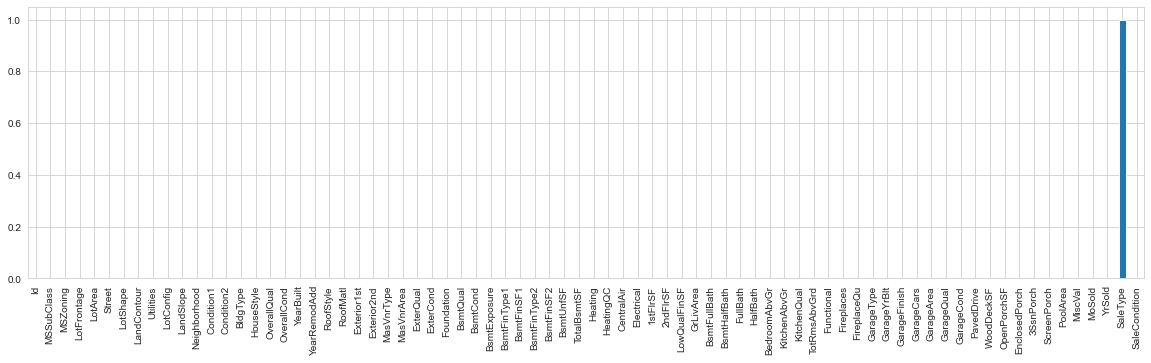

In [64]:
plt.figure(figsize=(20,5))
test_data.isnull().sum().plot(kind='bar')

In [65]:
test_data['SaleType'].value_counts()

WD       1258
New       117
COD        44
ConLD      17
CWD         8
Oth         4
ConLI       4
ConLw       3
Con         3
Name: SaleType, dtype: int64

In [66]:
test_data['SaleType']=test_data['SaleType'].fillna('WD')

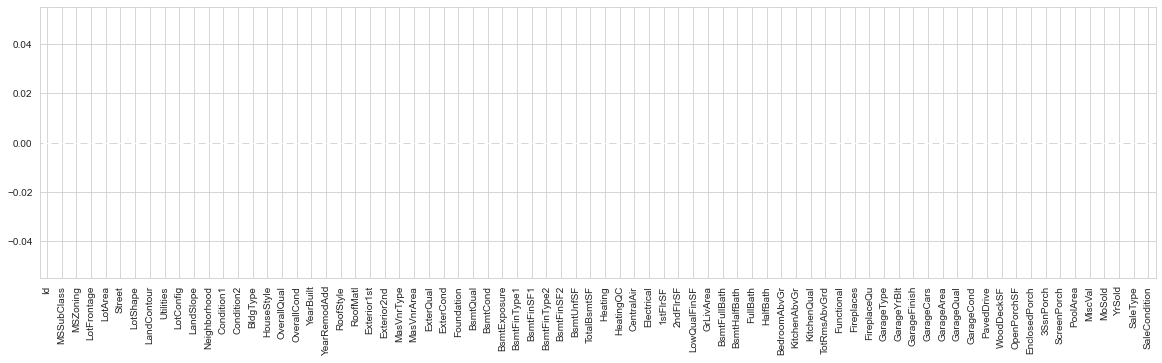

In [67]:
plt.figure(figsize=(20,5))
test_data.isnull().sum().plot(kind='bar')

In [68]:
train_data['MSSubClass']=train_data['MSSubClass'].astype(str)

In [69]:
test_data['MSSubClass']=test_data['MSSubClass'].astype(str)

In [70]:
convert={'OverallQual':str,'OverallCond':str}
train_data=train_data.astype(convert)
test_data=test_data.astype(convert)

In [71]:
train_data=train_data.drop('Id',axis=1)
test_data=test_data.drop('Id',axis=1)

In [72]:
train_data.columns.values

array(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'Wood

In [73]:
X_train=train_data.drop('SalePrice',axis=1)
y_train=train_data['SalePrice']

In [74]:
X_train.select_dtypes('object').columns.values

array(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype=object)

In [75]:
X_train.select_dtypes(include=['int64','float64']).columns.values

array(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MiscVal', 'MoSold', 'YrSold'], dtype=object)

In [76]:
category=['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

In [77]:
dummy=pd.get_dummies(X_train[category],drop_first=True)

In [78]:
x_train=X_train.drop(category,axis=1)

In [79]:
x_train=pd.concat([x_train,dummy],axis=1)
x_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,82.826455,8450,2003,2003,196.0,706,0,150,856,856,...,0,0,0,0,1,0,0,0,1,0
1,82.826455,9600,1976,1976,0.0,978,0,284,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,82.826455,11250,2001,2002,162.0,486,0,434,920,920,...,0,0,0,0,1,0,0,0,1,0
3,82.826455,9550,1915,1970,0.0,216,0,540,756,961,...,0,0,0,0,1,0,0,0,0,0
4,82.826455,14260,2000,2000,350.0,655,0,490,1145,1145,...,0,0,0,0,1,0,0,0,1,0


In [80]:
dummy_test=pd.get_dummies(test_data[category],drop_first=True)
x_test=test_data.drop(category,axis=1)
x_test=pd.concat([x_test,dummy_test],axis=1)
x_test.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,62.837538,11622,1961,1961,0.0,468.0,144.0,270.0,882.0,896,...,0,0,0,0,1,0,0,0,1,0
1,62.837538,14267,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,...,0,0,0,0,1,0,0,0,1,0
2,62.837538,13830,1997,1998,0.0,791.0,0.0,137.0,928.0,928,...,0,0,0,0,1,0,0,0,1,0
3,62.837538,9978,1998,1998,20.0,602.0,0.0,324.0,926.0,926,...,0,0,0,0,1,0,0,0,1,0
4,62.837538,5005,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,...,0,0,0,0,1,0,0,0,1,0


In [81]:
x_test.shape

(1459, 259)

In [82]:
absent=['Utilities_NoSeWa',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'HouseStyle_2.5Fin',
 'RoofMatl_CompShg',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'Heating_GasA',
 'Heating_OthW',
 'Electrical_Mix',
 'GarageQual_Ex']

In [83]:
for i in absent:
    x_test[i]=0

In [84]:
x_test.shape,x_train.shape

((1459, 275), (1460, 274))

In [85]:
extra=[]
for i in x_test.columns.values:
    if i not in x_train.columns.values:
        extra.append(i)
extra

['MSSubClass_150']

In [86]:
x_train['MSSubClass_150']=0

In [87]:
x_test.shape,x_train.shape

((1459, 275), (1460, 275))

In [88]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train[['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MiscVal', 'MoSold', 'YrSold']]=scaler.fit_transform(x_train[['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MiscVal', 'MoSold', 'YrSold']])

In [89]:
x_test[['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MiscVal', 'MoSold', 'YrSold']]=scaler.transform(x_test[['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MiscVal', 'MoSold', 'YrSold']])

In [90]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()

In [91]:
from sklearn.feature_selection import RFE
rfe=RFE(tree_reg,20)

In [92]:
rfe=rfe.fit(x_train,y_train)

In [93]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 256),
 ('LotArea', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', True, 1),
 ('MasVnrArea', True, 1),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 12),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 50),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 36),
 ('BsmtHalfBath', False, 88),
 ('FullBath', False, 25),
 ('HalfBath', False, 41),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 31),
 ('GarageYrBlt', True, 1),
 ('GarageCars', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 5),
 ('OpenPorchSF', True, 1),
 ('EnclosedPorch', False, 40),
 ('3SsnPorch', False, 119),
 ('ScreenPorch', False, 47),
 ('PoolArea', False, 184),
 ('MiscVal', False, 130),
 ('MoSold', False, 9),
 ('YrSold', False, 7),
 ('MSSubClass_160', False, 193),
 ('MSSubClass_180', False, 163),
 ('MSSubClass_190', False, 116),
 ('MSSubClass_20

In [94]:
col=x_train.columns[rfe.support_]

In [95]:
x_train=x_train[col]

In [96]:
import statsmodels.api as sm

In [97]:
x_train_1=sm.add_constant(x_train)
result=sm.OLS(y_train,x_train_1).fit()

In [98]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     287.8
Date:                Sun, 08 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:12:21   Log-Likelihood:                -17369.
No. Observations:                1460   AIC:                         3.478e+04
Df Residuals:                    1439   BIC:                         3.489e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.788e+05   4347.023     41.140      0.000     1.7e+05    1.87e+05
LotArea       5050.7362   1012.174      4.990      0.000    3065.241    7036.232
YearBuilt     5572.8550   1478.987      3.768      0.000    2671.654    8474.056
YearRemodAdd  6316.4964   1285.679      4.913      0.000    3794.491    8838.502
MasVnrArea    4616.3107   1103.313      4.184      0.000    2452.036    6780.585
BsmtFinSF1    3346.4813   2828.993      1.183      0.237   -2202.911    8895.873
BsmtUnfSF    -3156.2046   2668.778     -1.183      0.237   -8391.317    2078.908
TotalBsmtSF   8702.3652   3065.170      2.839      0.005    2689.686    1.47e+04
1stFlrSF      2.408e+04   7976.435      3.019      0.003    8434.384    3.97e+04
2ndFlrSF      2.474e+04   8863.266      2.791      0.005    7354.326    4.21e+04
GrLivArea     -993.2424   1.06e+04     -0.093      0.926   -2.19e+04    1.99e+04
BedroomAbvGr -5314.6124   1401.678     -3.792      0.000   -8064.163   -2565.062
KitchenAbvGr -8657.7809   1063.051     -8.144      0.000   -1.07e+04   -6572.486
TotRmsAbvGrd  7866.0184   2055.420      3.827      0.000    3834.079    1.19e+04
GarageYrBlt  -3588.2789   1269.410     -2.827      0.005   -6078.372   -1098.186
GarageCars    1.394e+04   2255.916      6.181      0.000    9519.435    1.84e+04
GarageArea    -883.3247   2112.923     -0.418      0.676   -5028.064    3261.415
OpenPorchSF   -593.1100   1025.229     -0.579      0.563   -2604.213    1417.993
ExterQual_TA -2.041e+04   2835.523     -7.199      0.000    -2.6e+04   -1.49e+04
BsmtQual_Ex   5.179e+04   4062.863     12.747      0.000    4.38e+04    5.98e+04
CentralAir_Y  1.119e+04   4403.622      2.541      0.011    2549.505    1.98e+04
==============================================================================
Omnibus:                     1039.847   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           176660.656
Skew:                          -2.350   Prob(JB):                         0.00
Kurtosis:                      56.684   Cond. No.                         38.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=x_train.columns.values
vif['VIF']=[np.round(variance_inflation_factor(x_train.values,i),2) for i in range(x_train.shape[1])]

In [100]:
vif

,Features,VIF
0,LotArea,1.17
1,YearBuilt,2.47
2,YearRemodAdd,1.88
3,MasVnrArea,1.39
4,BsmtFinSF1,9.13
5,BsmtUnfSF,8.10
6,TotalBsmtSF,10.70
7,1stFlrSF,72.59
8,2ndFlrSF,89.60
9,GrLivArea,129.31


In [101]:
x_train=x_train.drop('GarageArea',axis=1)

In [102]:
sm.OLS(y_train,sm.add_constant(x_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     303.2
Date:                Sun, 08 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:12:21   Log-Likelihood:                -17369.
No. Observations:                1460   AIC:                         3.478e+04
Df Residuals:                    1440   BIC:                         3.488e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.789e+05   4345.286     41.163      0.000     1.7e+05    1.87e+05
LotArea       5043.5676   1011.739      4.985      0.000    3058.927    7028.208
YearBuilt     5595.3588   1477.583      3.787      0.000    2696.913    8493.805
YearRemodAdd  6327.3730   1285.047      4.924      0.000    3806.608    8848.138
MasVnrArea    4593.1221   1101.602      4.169      0.000    2432.205    6754.039
BsmtFinSF1    3303.4595   2826.310      1.169      0.243   -2240.667    8847.586
BsmtUnfSF    -3154.4396   2668.010     -1.182      0.237   -8388.042    2079.163
TotalBsmtSF   8671.7046   3063.414      2.831      0.005    2662.473    1.47e+04
1stFlrSF      2.415e+04   7972.375      3.029      0.002    8512.695    3.98e+04
2ndFlrSF      2.488e+04   8854.514      2.810      0.005    7510.233    4.22e+04
GrLivArea    -1197.7770   1.06e+04     -0.113      0.910   -2.21e+04    1.97e+04
BedroomAbvGr -5303.0831   1401.005     -3.785      0.000   -8051.312   -2554.855
KitchenAbvGr -8656.8247   1062.744     -8.146      0.000   -1.07e+04   -6572.133
TotRmsAbvGrd  7894.3536   2053.713      3.844      0.000    3865.764    1.19e+04
GarageYrBlt  -3657.4644   1258.216     -2.907      0.004   -6125.596   -1189.332
GarageCars    1.327e+04   1584.224      8.379      0.000    1.02e+04    1.64e+04
OpenPorchSF   -626.1925   1021.877     -0.613      0.540   -2630.720    1378.335
ExterQual_TA -2.039e+04   2834.028     -7.194      0.000   -2.59e+04   -1.48e+04
BsmtQual_Ex   5.171e+04   4056.854     12.745      0.000    4.37e+04    5.97e+04
CentralAir_Y  1.115e+04   4401.366      2.533      0.011    2514.809    1.98e+04
==============================================================================
Omnibus:                     1045.708   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           179923.465
Skew:                          -2.369   Prob(JB):                         0.00
Kurtosis:                      57.177   Cond. No.                         36.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
vif=pd.DataFrame()
vif['Features']=x_train.columns.values
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif

,Features,VIF
0,LotArea,1.168118
1,YearBuilt,2.463988
2,YearRemodAdd,1.878652
3,MasVnrArea,1.383726
4,BsmtFinSF1,9.118204
5,BsmtUnfSF,8.099865
6,TotalBsmtSF,10.696236
7,1stFlrSF,72.553094
8,2ndFlrSF,89.468047
9,GrLivArea,129.040425


In [105]:
x_train.drop('GrLivArea',axis=1,inplace=True)

In [106]:
sm.OLS(y_train,sm.add_constant(x_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     320.2
Date:                Sun, 08 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:13:56   Log-Likelihood:                -17369.
No. Observations:                1460   AIC:                         3.478e+04
Df Residuals:                    1441   BIC:                         3.488e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.789e+05   4343.756     41.178      0.000     1.7e+05    1.87e+05
LotArea       5044.4951   1011.359      4.988      0.000    3060.601    7028.389
YearBuilt     5623.7313   1455.464      3.864      0.000    2768.676    8478.787
YearRemodAdd  6329.0245   1284.523      4.927      0.000    3809.289    8848.760
MasVnrArea    4598.1999   1100.303      4.179      0.000    2439.833    6756.567
BsmtFinSF1    3308.2080   2825.028      1.171      0.242   -2233.399    8849.815
BsmtUnfSF    -3149.3664   2666.716     -1.181      0.238   -8380.427    2081.694
TotalBsmtSF   8664.8372   3061.758      2.830      0.005    2658.857    1.47e+04
1stFlrSF      2.328e+04   2088.153     11.151      0.000    1.92e+04    2.74e+04
2ndFlrSF       2.39e+04   1717.744     13.914      0.000    2.05e+04    2.73e+04
BedroomAbvGr -5302.7798   1400.522     -3.786      0.000   -8050.060   -2555.500
KitchenAbvGr -8647.2563   1058.982     -8.166      0.000   -1.07e+04   -6569.946
TotRmsAbvGrd  7861.2436   2031.879      3.869      0.000    3875.485    1.18e+04
GarageYrBlt  -3641.8037   1250.085     -2.913      0.004   -6093.985   -1189.623
GarageCars    1.327e+04   1583.310      8.381      0.000    1.02e+04    1.64e+04
OpenPorchSF   -628.1432   1021.380     -0.615      0.539   -2631.695    1375.408
ExterQual_TA -2.036e+04   2819.950     -7.219      0.000   -2.59e+04   -1.48e+04
BsmtQual_Ex    5.17e+04   4055.444     12.749      0.000    4.37e+04    5.97e+04
CentralAir_Y  1.113e+04   4395.320      2.531      0.011    2504.159    1.97e+04
==============================================================================
Omnibus:                     1046.180   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           179948.034
Skew:                          -2.371   Prob(JB):                         0.00
Kurtosis:                      57.181   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
vif=pd.DataFrame()
vif['Features']=x_train.columns.values
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
6,TotalBsmtSF,10.691919
4,BsmtFinSF1,9.116163
5,BsmtUnfSF,8.097481
15,ExterQual_TA,5.264464
7,1stFlrSF,4.978907
11,TotRmsAbvGrd,4.713668
17,CentralAir_Y,4.393291
8,2ndFlrSF,3.346808
13,GarageCars,2.841361
1,YearBuilt,2.391975


In [108]:
x_train.drop('OpenPorchSF',axis=1,inplace=True)

In [109]:
sm.OLS(y_train,sm.add_constant(x_train)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     339.2
Date:                Sun, 08 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:14:25   Log-Likelihood:                -17369.
No. Observations:                1460   AIC:                         3.477e+04
Df Residuals:                    1442   BIC:                         3.487e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.787e+05   4333.238     41.237      0.000     1.7e+05    1.87e+05
LotArea       5043.1455   1011.139      4.988      0.000    3059.685    7026.606
YearBuilt     5595.5200   1454.427      3.847      0.000    2742.500    8448.540
YearRemodAdd  6284.1815   1282.175      4.901      0.000    3769.053    8799.310
MasVnrArea    4641.0380   1097.859      4.227      0.000    2487.466    6794.610
BsmtFinSF1    3332.6612   2824.139      1.180      0.238   -2207.199    8872.522
BsmtUnfSF    -3132.1164   2665.993     -1.175      0.240   -8361.757    2097.524
TotalBsmtSF   8546.0828   3055.004      2.797      0.005    2553.355    1.45e+04
1stFlrSF      2.321e+04   2083.751     11.136      0.000    1.91e+04    2.73e+04
2ndFlrSF      2.372e+04   1692.110     14.018      0.000    2.04e+04     2.7e+04
BedroomAbvGr -5285.7772   1399.947     -3.776      0.000   -8031.928   -2539.626
KitchenAbvGr -8602.4040   1056.239     -8.144      0.000   -1.07e+04   -6530.474
TotRmsAbvGrd  7878.6861   2031.243      3.879      0.000    3894.178    1.19e+04
GarageYrBlt  -3613.8019   1248.986     -2.893      0.004   -6063.826   -1163.778
GarageCars    1.326e+04   1582.841      8.376      0.000    1.02e+04    1.64e+04
ExterQual_TA -2.032e+04   2818.663     -7.208      0.000   -2.58e+04   -1.48e+04
BsmtQual_Ex   5.154e+04   4045.468     12.739      0.000    4.36e+04    5.95e+04
CentralAir_Y  1.131e+04   4384.701      2.578      0.010    2704.239    1.99e+04
==============================================================================
Omnibus:                     1048.947   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           181780.338
Skew:                          -2.380   Prob(JB):                         0.00
Kurtosis:                      57.457   Cond. No.                         12.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
vif=pd.DataFrame()
vif['Features']=x_train.columns.values
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
6,TotalBsmtSF,10.652691
4,BsmtFinSF1,9.114536
5,BsmtUnfSF,8.097113
14,ExterQual_TA,5.264330
7,1stFlrSF,4.959074
11,TotRmsAbvGrd,4.712518
16,CentralAir_Y,4.392152
8,2ndFlrSF,3.241333
13,GarageCars,2.840368
1,YearBuilt,2.390532


In [111]:
x_train.drop('BsmtUnfSF',axis=1,inplace=True)

In [112]:
result=sm.OLS(y_train,sm.add_constant(x_train)).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     360.2
Date:                Sun, 08 Nov 2020   Prob (F-statistic):               0.00
Time:                        20:14:53   Log-Likelihood:                -17370.
No. Observations:                1460   AIC:                         3.477e+04
Df Residuals:                    1443   BIC:                         3.486e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.784e+05   4326.846     41.231      0.000     1.7e+05    1.87e+05
LotArea       5150.1433   1007.161      5.114      0.000    3174.486    7125.800
YearBuilt     5606.5377   1454.589      3.854      0.000    2753.203    8459.872
YearRemodAdd  6226.4245   1281.401      4.859      0.000    3712.815    8740.033
MasVnrArea    4550.4987   1095.295      4.155      0.000    2401.958    6699.040
BsmtFinSF1    6361.5166   1153.045      5.517      0.000    4099.693    8623.340
TotalBsmtSF   5673.8823   1832.236      3.097      0.002    2079.751    9268.014
1stFlrSF      2.334e+04   2081.057     11.214      0.000    1.93e+04    2.74e+04
2ndFlrSF      2.376e+04   1691.939     14.045      0.000    2.04e+04    2.71e+04
BedroomAbvGr -5323.7529   1399.758     -3.803      0.000   -8069.532   -2577.974
KitchenAbvGr -8642.6834   1055.822     -8.186      0.000   -1.07e+04   -6571.573
TotRmsAbvGrd  7811.2661   2030.700      3.847      0.000    3827.826    1.18e+04
GarageYrBlt  -3538.2234   1247.493     -2.836      0.005   -5985.316   -1091.130
GarageCars    1.316e+04   1580.794      8.324      0.000    1.01e+04    1.63e+04
ExterQual_TA  -2.01e+04   2812.940     -7.146      0.000   -2.56e+04   -1.46e+04
BsmtQual_Ex   5.142e+04   4044.791     12.713      0.000    4.35e+04    5.94e+04
CentralAir_Y  1.148e+04   4382.764      2.619      0.009    2882.454    2.01e+04
==============================================================================
Omnibus:                     1056.004   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           184772.910
Skew:                          -2.405   Prob(JB):                         0.00
Kurtosis:                      57.902   Cond. No.                         12.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
vif=pd.DataFrame()
vif['Features']=x_train.columns.values
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
13,ExterQual_TA,5.249517
6,1stFlrSF,4.945681
10,TotRmsAbvGrd,4.709117
15,CentralAir_Y,4.386618
5,TotalBsmtSF,3.834938
7,2ndFlrSF,3.240487
12,GarageCars,2.830557
1,YearBuilt,2.390156
8,BedroomAbvGr,2.218335
2,YearRemodAdd,1.870793


We have reduced multicollinearity as much as possible to get desired results

In [114]:
x_train.head()

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageCars,ExterQual_TA,BsmtQual_Ex,CentralAir_Y
0,-0.207142,1.050994,0.878668,0.514104,0.575425,-0.459303,-0.793434,1.161852,0.163779,-0.211454,0.912210,0.296026,0.311725,0,0,1
1,-0.091886,0.156734,-0.429577,-0.570750,1.171992,0.466465,0.257140,-0.795163,0.163779,-0.211454,-0.318683,0.236495,0.311725,1,0,1
2,0.073480,0.984752,0.830215,0.325915,0.092907,-0.313369,-0.627826,1.189351,0.163779,-0.211454,-0.318683,0.291616,0.311725,0,0,1
3,-0.096897,-1.863632,-0.720298,-0.570750,-0.499274,-0.687324,-0.521734,0.937276,0.163779,-0.211454,0.296763,0.285002,1.650307,1,0,1
4,0.375148,0.951632,0.733308,1.366489,0.463568,0.199680,-0.045611,1.617877,1.390023,-0.211454,1.527656,0.289412,1.650307,0,0,1


In [115]:
x_train.shape,y_train.shape

((1460, 16), (1460,))

In [117]:
col=x_train.columns.values
x_test=x_test[col]

In [119]:
target=pd.read_csv('sample_submission.csv')
target

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [127]:
x_train

,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,GarageYrBlt,GarageCars,ExterQual_TA,BsmtQual_Ex,CentralAir_Y
0,-0.207142,1.050994,0.878668,0.514104,0.575425,-0.459303,-0.793434,1.161852,0.163779,-0.211454,0.912210,0.296026,0.311725,0,0,1
1,-0.091886,0.156734,-0.429577,-0.570750,1.171992,0.466465,0.257140,-0.795163,0.163779,-0.211454,-0.318683,0.236495,0.311725,1,0,1
2,0.073480,0.984752,0.830215,0.325915,0.092907,-0.313369,-0.627826,1.189351,0.163779,-0.211454,-0.318683,0.291616,0.311725,0,0,1
3,-0.096897,-1.863632,-0.720298,-0.570750,-0.499274,-0.687324,-0.521734,0.937276,0.163779,-0.211454,0.296763,0.285002,1.650307,1,0,1
4,0.375148,0.951632,0.733308,1.366489,0.463568,0.199680,-0.045611,1.617877,1.390023,-0.211454,1.527656,0.289412,1.650307,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.260560,0.918511,0.733308,-0.570750,-0.973018,-0.238122,-0.542435,0.795198,0.163779,-0.211454,0.296763,0.287207,0.311725,1,0,1
1456,0.266407,0.222975,0.151865,0.087911,0.759659,1.104925,2.355701,-0.795163,0.163779,-0.211454,0.296763,0.240904,0.311725,1,0,1
1457,-0.147810,-1.002492,1.024029,-0.570750,-0.369871,0.215641,0.065656,1.844744,1.390023,-0.211454,1.527656,0.159324,-1.026858,0,0,1
1458,-0.080160,-0.704406,0.539493,-0.570750,-0.865548,0.046905,-0.218982,-0.795163,-1.062465,-0.211454,-0.934130,0.179168,-1.026858,1,0,1


In [130]:
import tensorflow as tf

In [131]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(100,input_dim=x_train.shape[1],activation='relu'),
    tf.keras.layers.Dense(50,activation='relu'),
    tf.keras.layers.Dense(25,activation='relu'),
    tf.keras.layers.Dense(1,activation='linear')
])

In [132]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

In [133]:
model.fit(x_train,y_train,validation_data=(x_test,target['SalePrice']),epochs=1000,verbose=2)

Epoch 1/1000
46/46 - 1s - loss: 39038406656.0000 - accuracy: 0.0000e+00 - val_loss: 32376758272.0000 - val_accuracy: 0.0000e+00
Epoch 2/1000
46/46 - 1s - loss: 39027036160.0000 - accuracy: 0.0000e+00 - val_loss: 32351264768.0000 - val_accuracy: 0.0000e+00
Epoch 3/1000
46/46 - 0s - loss: 38949023744.0000 - accuracy: 0.0000e+00 - val_loss: 32217647104.0000 - val_accuracy: 0.0000e+00
Epoch 4/1000
46/46 - 0s - loss: 38627397632.0000 - accuracy: 0.0000e+00 - val_loss: 31770726400.0000 - val_accuracy: 0.0000e+00
Epoch 5/1000
46/46 - 0s - loss: 37712990208.0000 - accuracy: 0.0000e+00 - val_loss: 30708232192.0000 - val_accuracy: 0.0000e+00
Epoch 6/1000
46/46 - 0s - loss: 35737305088.0000 - accuracy: 0.0000e+00 - val_loss: 28658319360.0000 - val_accuracy: 0.0000e+00
Epoch 7/1000
46/46 - 0s - loss: 32267235328.0000 - accuracy: 0.0000e+00 - val_loss: 25376630784.0000 - val_accuracy: 0.0000e+00
Epoch 8/1000
46/46 - 0s - loss: 26942023680.0000 - accuracy: 0.0000e+00 - val_loss: 21005510656.0000 - v

Epoch 66/1000
46/46 - 0s - loss: 1405120000.0000 - accuracy: 0.0000e+00 - val_loss: 4824835072.0000 - val_accuracy: 0.0000e+00
Epoch 67/1000
46/46 - 0s - loss: 1380731776.0000 - accuracy: 0.0000e+00 - val_loss: 4919740928.0000 - val_accuracy: 0.0000e+00
Epoch 68/1000
46/46 - 0s - loss: 1378432128.0000 - accuracy: 0.0000e+00 - val_loss: 4986475008.0000 - val_accuracy: 0.0000e+00
Epoch 69/1000
46/46 - 0s - loss: 1377320704.0000 - accuracy: 0.0000e+00 - val_loss: 4943438848.0000 - val_accuracy: 0.0000e+00
Epoch 70/1000
46/46 - 0s - loss: 1370433920.0000 - accuracy: 0.0000e+00 - val_loss: 4866812928.0000 - val_accuracy: 0.0000e+00
Epoch 71/1000
46/46 - 0s - loss: 1356399232.0000 - accuracy: 0.0000e+00 - val_loss: 4890800128.0000 - val_accuracy: 0.0000e+00
Epoch 72/1000
46/46 - 0s - loss: 1349129600.0000 - accuracy: 0.0000e+00 - val_loss: 4834768896.0000 - val_accuracy: 0.0000e+00
Epoch 73/1000
46/46 - 0s - loss: 1344544384.0000 - accuracy: 0.0000e+00 - val_loss: 4850584576.0000 - val_accur

Epoch 131/1000
46/46 - 0s - loss: 1198952192.0000 - accuracy: 0.0000e+00 - val_loss: 4722385408.0000 - val_accuracy: 0.0000e+00
Epoch 132/1000
46/46 - 0s - loss: 1201119872.0000 - accuracy: 0.0000e+00 - val_loss: 4780939776.0000 - val_accuracy: 0.0000e+00
Epoch 133/1000
46/46 - 0s - loss: 1195573120.0000 - accuracy: 0.0000e+00 - val_loss: 4758657024.0000 - val_accuracy: 0.0000e+00
Epoch 134/1000
46/46 - 0s - loss: 1198683008.0000 - accuracy: 0.0000e+00 - val_loss: 4745862144.0000 - val_accuracy: 0.0000e+00
Epoch 135/1000
46/46 - 0s - loss: 1194629120.0000 - accuracy: 0.0000e+00 - val_loss: 4763088384.0000 - val_accuracy: 0.0000e+00
Epoch 136/1000
46/46 - 0s - loss: 1190525824.0000 - accuracy: 0.0000e+00 - val_loss: 4822733312.0000 - val_accuracy: 0.0000e+00
Epoch 137/1000
46/46 - 0s - loss: 1191613824.0000 - accuracy: 0.0000e+00 - val_loss: 4717677568.0000 - val_accuracy: 0.0000e+00
Epoch 138/1000
46/46 - 0s - loss: 1192200448.0000 - accuracy: 0.0000e+00 - val_loss: 4783463936.0000 - v

46/46 - 0s - loss: 1148077952.0000 - accuracy: 0.0000e+00 - val_loss: 4781852672.0000 - val_accuracy: 0.0000e+00
Epoch 196/1000
46/46 - 0s - loss: 1146972672.0000 - accuracy: 0.0000e+00 - val_loss: 4788663808.0000 - val_accuracy: 0.0000e+00
Epoch 197/1000
46/46 - 0s - loss: 1146979968.0000 - accuracy: 0.0000e+00 - val_loss: 4737986560.0000 - val_accuracy: 0.0000e+00
Epoch 198/1000
46/46 - 0s - loss: 1146179712.0000 - accuracy: 0.0000e+00 - val_loss: 4801391616.0000 - val_accuracy: 0.0000e+00
Epoch 199/1000
46/46 - 0s - loss: 1146741888.0000 - accuracy: 0.0000e+00 - val_loss: 4742705152.0000 - val_accuracy: 0.0000e+00
Epoch 200/1000
46/46 - 0s - loss: 1145195776.0000 - accuracy: 0.0000e+00 - val_loss: 4806944256.0000 - val_accuracy: 0.0000e+00
Epoch 201/1000
46/46 - 0s - loss: 1146000000.0000 - accuracy: 0.0000e+00 - val_loss: 4784068096.0000 - val_accuracy: 0.0000e+00
Epoch 202/1000
46/46 - 0s - loss: 1145678208.0000 - accuracy: 0.0000e+00 - val_loss: 4794428416.0000 - val_accuracy: 0.

Epoch 260/1000
46/46 - 0s - loss: 1121650176.0000 - accuracy: 0.0000e+00 - val_loss: 4749594112.0000 - val_accuracy: 0.0000e+00
Epoch 261/1000
46/46 - 0s - loss: 1117513088.0000 - accuracy: 0.0000e+00 - val_loss: 4778194944.0000 - val_accuracy: 0.0000e+00
Epoch 262/1000
46/46 - 0s - loss: 1116520448.0000 - accuracy: 0.0000e+00 - val_loss: 4770788864.0000 - val_accuracy: 0.0000e+00
Epoch 263/1000
46/46 - 0s - loss: 1113341568.0000 - accuracy: 0.0000e+00 - val_loss: 4730478592.0000 - val_accuracy: 0.0000e+00
Epoch 264/1000
46/46 - 0s - loss: 1116610048.0000 - accuracy: 0.0000e+00 - val_loss: 4778252288.0000 - val_accuracy: 0.0000e+00
Epoch 265/1000
46/46 - 0s - loss: 1124189056.0000 - accuracy: 0.0000e+00 - val_loss: 4764439040.0000 - val_accuracy: 0.0000e+00
Epoch 266/1000
46/46 - 0s - loss: 1121711360.0000 - accuracy: 0.0000e+00 - val_loss: 4629785600.0000 - val_accuracy: 0.0000e+00
Epoch 267/1000
46/46 - 0s - loss: 1121247872.0000 - accuracy: 0.0000e+00 - val_loss: 4705552384.0000 - v

46/46 - 0s - loss: 1093625856.0000 - accuracy: 0.0000e+00 - val_loss: 4740100608.0000 - val_accuracy: 0.0000e+00
Epoch 325/1000
46/46 - 0s - loss: 1094750208.0000 - accuracy: 0.0000e+00 - val_loss: 4783977472.0000 - val_accuracy: 0.0000e+00
Epoch 326/1000
46/46 - 0s - loss: 1099369216.0000 - accuracy: 0.0000e+00 - val_loss: 4809130496.0000 - val_accuracy: 0.0000e+00
Epoch 327/1000
46/46 - 0s - loss: 1093503360.0000 - accuracy: 0.0000e+00 - val_loss: 4864897024.0000 - val_accuracy: 0.0000e+00
Epoch 328/1000
46/46 - 0s - loss: 1104190976.0000 - accuracy: 0.0000e+00 - val_loss: 4764351488.0000 - val_accuracy: 0.0000e+00
Epoch 329/1000
46/46 - 0s - loss: 1092560384.0000 - accuracy: 0.0000e+00 - val_loss: 4744498176.0000 - val_accuracy: 0.0000e+00
Epoch 330/1000
46/46 - 0s - loss: 1095804288.0000 - accuracy: 0.0000e+00 - val_loss: 4776472576.0000 - val_accuracy: 0.0000e+00
Epoch 331/1000
46/46 - 0s - loss: 1098069504.0000 - accuracy: 0.0000e+00 - val_loss: 4759548416.0000 - val_accuracy: 0.

Epoch 389/1000
46/46 - 0s - loss: 1074352000.0000 - accuracy: 0.0000e+00 - val_loss: 4775820800.0000 - val_accuracy: 0.0000e+00
Epoch 390/1000
46/46 - 0s - loss: 1074656384.0000 - accuracy: 0.0000e+00 - val_loss: 4813520896.0000 - val_accuracy: 0.0000e+00
Epoch 391/1000
46/46 - 0s - loss: 1072285696.0000 - accuracy: 0.0000e+00 - val_loss: 4793347072.0000 - val_accuracy: 0.0000e+00
Epoch 392/1000
46/46 - 0s - loss: 1083243520.0000 - accuracy: 0.0000e+00 - val_loss: 4707594752.0000 - val_accuracy: 0.0000e+00
Epoch 393/1000
46/46 - 0s - loss: 1074569728.0000 - accuracy: 0.0000e+00 - val_loss: 4789434368.0000 - val_accuracy: 0.0000e+00
Epoch 394/1000
46/46 - 0s - loss: 1076675712.0000 - accuracy: 0.0000e+00 - val_loss: 4713463808.0000 - val_accuracy: 0.0000e+00
Epoch 395/1000
46/46 - 0s - loss: 1076813696.0000 - accuracy: 0.0000e+00 - val_loss: 4744788992.0000 - val_accuracy: 0.0000e+00
Epoch 396/1000
46/46 - 0s - loss: 1073684928.0000 - accuracy: 0.0000e+00 - val_loss: 4690771456.0000 - v

46/46 - 0s - loss: 1056577408.0000 - accuracy: 0.0000e+00 - val_loss: 4694255616.0000 - val_accuracy: 0.0000e+00
Epoch 454/1000
46/46 - 0s - loss: 1060789952.0000 - accuracy: 0.0000e+00 - val_loss: 4732935680.0000 - val_accuracy: 0.0000e+00
Epoch 455/1000
46/46 - 0s - loss: 1052568960.0000 - accuracy: 0.0000e+00 - val_loss: 4783420928.0000 - val_accuracy: 0.0000e+00
Epoch 456/1000
46/46 - 0s - loss: 1054479872.0000 - accuracy: 0.0000e+00 - val_loss: 4721817600.0000 - val_accuracy: 0.0000e+00
Epoch 457/1000
46/46 - 0s - loss: 1054695616.0000 - accuracy: 0.0000e+00 - val_loss: 4808022016.0000 - val_accuracy: 0.0000e+00
Epoch 458/1000
46/46 - 0s - loss: 1050725568.0000 - accuracy: 0.0000e+00 - val_loss: 4767576576.0000 - val_accuracy: 0.0000e+00
Epoch 459/1000
46/46 - 0s - loss: 1052326528.0000 - accuracy: 0.0000e+00 - val_loss: 4739845632.0000 - val_accuracy: 0.0000e+00
Epoch 460/1000
46/46 - 0s - loss: 1053435200.0000 - accuracy: 0.0000e+00 - val_loss: 4822225920.0000 - val_accuracy: 0.

Epoch 518/1000
46/46 - 0s - loss: 1043408000.0000 - accuracy: 0.0000e+00 - val_loss: 4721656832.0000 - val_accuracy: 0.0000e+00
Epoch 519/1000
46/46 - 0s - loss: 1040082368.0000 - accuracy: 0.0000e+00 - val_loss: 4720079360.0000 - val_accuracy: 0.0000e+00
Epoch 520/1000
46/46 - 0s - loss: 1039690304.0000 - accuracy: 0.0000e+00 - val_loss: 4690695168.0000 - val_accuracy: 0.0000e+00
Epoch 521/1000
46/46 - 0s - loss: 1037522880.0000 - accuracy: 0.0000e+00 - val_loss: 4854801408.0000 - val_accuracy: 0.0000e+00
Epoch 522/1000
46/46 - 0s - loss: 1036452928.0000 - accuracy: 0.0000e+00 - val_loss: 4738223104.0000 - val_accuracy: 0.0000e+00
Epoch 523/1000
46/46 - 0s - loss: 1042249280.0000 - accuracy: 0.0000e+00 - val_loss: 4803463680.0000 - val_accuracy: 0.0000e+00
Epoch 524/1000
46/46 - 0s - loss: 1036208256.0000 - accuracy: 0.0000e+00 - val_loss: 4781710848.0000 - val_accuracy: 0.0000e+00
Epoch 525/1000
46/46 - 0s - loss: 1038303168.0000 - accuracy: 0.0000e+00 - val_loss: 4763216384.0000 - v

46/46 - 0s - loss: 1023214400.0000 - accuracy: 0.0000e+00 - val_loss: 4752587776.0000 - val_accuracy: 0.0000e+00
Epoch 583/1000
46/46 - 0s - loss: 1024104320.0000 - accuracy: 0.0000e+00 - val_loss: 4824313344.0000 - val_accuracy: 0.0000e+00
Epoch 584/1000
46/46 - 0s - loss: 1024986432.0000 - accuracy: 0.0000e+00 - val_loss: 4784559104.0000 - val_accuracy: 0.0000e+00
Epoch 585/1000
46/46 - 0s - loss: 1024243456.0000 - accuracy: 0.0000e+00 - val_loss: 4762213376.0000 - val_accuracy: 0.0000e+00
Epoch 586/1000
46/46 - 0s - loss: 1021056192.0000 - accuracy: 0.0000e+00 - val_loss: 4832373760.0000 - val_accuracy: 0.0000e+00
Epoch 587/1000
46/46 - 0s - loss: 1028531072.0000 - accuracy: 0.0000e+00 - val_loss: 4747992064.0000 - val_accuracy: 0.0000e+00
Epoch 588/1000
46/46 - 0s - loss: 1020694016.0000 - accuracy: 0.0000e+00 - val_loss: 4839872000.0000 - val_accuracy: 0.0000e+00
Epoch 589/1000
46/46 - 0s - loss: 1020981568.0000 - accuracy: 0.0000e+00 - val_loss: 4766270464.0000 - val_accuracy: 0.

Epoch 647/1000
46/46 - 0s - loss: 1014797568.0000 - accuracy: 0.0000e+00 - val_loss: 4786341888.0000 - val_accuracy: 0.0000e+00
Epoch 648/1000
46/46 - 0s - loss: 1017165248.0000 - accuracy: 0.0000e+00 - val_loss: 4734178816.0000 - val_accuracy: 0.0000e+00
Epoch 649/1000
46/46 - 0s - loss: 1007641920.0000 - accuracy: 0.0000e+00 - val_loss: 4780685824.0000 - val_accuracy: 0.0000e+00
Epoch 650/1000
46/46 - 0s - loss: 1007531136.0000 - accuracy: 0.0000e+00 - val_loss: 4753308672.0000 - val_accuracy: 0.0000e+00
Epoch 651/1000
46/46 - 0s - loss: 1014319232.0000 - accuracy: 0.0000e+00 - val_loss: 4914758144.0000 - val_accuracy: 0.0000e+00
Epoch 652/1000
46/46 - 0s - loss: 1006184640.0000 - accuracy: 0.0000e+00 - val_loss: 4698952704.0000 - val_accuracy: 0.0000e+00
Epoch 653/1000
46/46 - 0s - loss: 1007130432.0000 - accuracy: 0.0000e+00 - val_loss: 4723112448.0000 - val_accuracy: 0.0000e+00
Epoch 654/1000
46/46 - 0s - loss: 1012561280.0000 - accuracy: 0.0000e+00 - val_loss: 4639605248.0000 - v

Epoch 712/1000
46/46 - 0s - loss: 999990144.0000 - accuracy: 0.0000e+00 - val_loss: 4937172480.0000 - val_accuracy: 0.0000e+00
Epoch 713/1000
46/46 - 0s - loss: 992606016.0000 - accuracy: 0.0000e+00 - val_loss: 4682071040.0000 - val_accuracy: 0.0000e+00
Epoch 714/1000
46/46 - 0s - loss: 994462656.0000 - accuracy: 0.0000e+00 - val_loss: 4767681536.0000 - val_accuracy: 0.0000e+00
Epoch 715/1000
46/46 - 0s - loss: 995966464.0000 - accuracy: 0.0000e+00 - val_loss: 4752425472.0000 - val_accuracy: 0.0000e+00
Epoch 716/1000
46/46 - 0s - loss: 992377472.0000 - accuracy: 0.0000e+00 - val_loss: 4751458304.0000 - val_accuracy: 0.0000e+00
Epoch 717/1000
46/46 - 0s - loss: 996028544.0000 - accuracy: 0.0000e+00 - val_loss: 4897428992.0000 - val_accuracy: 0.0000e+00
Epoch 718/1000
46/46 - 0s - loss: 996840512.0000 - accuracy: 0.0000e+00 - val_loss: 4924345856.0000 - val_accuracy: 0.0000e+00
Epoch 719/1000
46/46 - 0s - loss: 1009745408.0000 - accuracy: 0.0000e+00 - val_loss: 4797285376.0000 - val_accu

Epoch 777/1000
46/46 - 0s - loss: 983330304.0000 - accuracy: 0.0000e+00 - val_loss: 4811289088.0000 - val_accuracy: 0.0000e+00
Epoch 778/1000
46/46 - 0s - loss: 981453376.0000 - accuracy: 0.0000e+00 - val_loss: 4815762944.0000 - val_accuracy: 0.0000e+00
Epoch 779/1000
46/46 - 0s - loss: 981762688.0000 - accuracy: 0.0000e+00 - val_loss: 4810962944.0000 - val_accuracy: 0.0000e+00
Epoch 780/1000
46/46 - 0s - loss: 992703616.0000 - accuracy: 0.0000e+00 - val_loss: 4996510208.0000 - val_accuracy: 0.0000e+00
Epoch 781/1000
46/46 - 0s - loss: 984181056.0000 - accuracy: 0.0000e+00 - val_loss: 4711795712.0000 - val_accuracy: 0.0000e+00
Epoch 782/1000
46/46 - 0s - loss: 991952960.0000 - accuracy: 0.0000e+00 - val_loss: 4646002688.0000 - val_accuracy: 0.0000e+00
Epoch 783/1000
46/46 - 0s - loss: 981193664.0000 - accuracy: 0.0000e+00 - val_loss: 4890514944.0000 - val_accuracy: 0.0000e+00
Epoch 784/1000
46/46 - 0s - loss: 985664192.0000 - accuracy: 0.0000e+00 - val_loss: 4755070976.0000 - val_accur

Epoch 842/1000
46/46 - 0s - loss: 968634048.0000 - accuracy: 0.0000e+00 - val_loss: 4821879296.0000 - val_accuracy: 0.0000e+00
Epoch 843/1000
46/46 - 0s - loss: 972587712.0000 - accuracy: 0.0000e+00 - val_loss: 4773225472.0000 - val_accuracy: 0.0000e+00
Epoch 844/1000
46/46 - 0s - loss: 975506880.0000 - accuracy: 0.0000e+00 - val_loss: 4887944704.0000 - val_accuracy: 0.0000e+00
Epoch 845/1000
46/46 - 0s - loss: 972149696.0000 - accuracy: 0.0000e+00 - val_loss: 4775469056.0000 - val_accuracy: 0.0000e+00
Epoch 846/1000
46/46 - 0s - loss: 969890240.0000 - accuracy: 0.0000e+00 - val_loss: 4727951360.0000 - val_accuracy: 0.0000e+00
Epoch 847/1000
46/46 - 0s - loss: 968267904.0000 - accuracy: 0.0000e+00 - val_loss: 4789358080.0000 - val_accuracy: 0.0000e+00
Epoch 848/1000
46/46 - 0s - loss: 970481536.0000 - accuracy: 0.0000e+00 - val_loss: 4775720448.0000 - val_accuracy: 0.0000e+00
Epoch 849/1000
46/46 - 0s - loss: 972417984.0000 - accuracy: 0.0000e+00 - val_loss: 4784347136.0000 - val_accur

Epoch 907/1000
46/46 - 0s - loss: 957389312.0000 - accuracy: 0.0000e+00 - val_loss: 4806246400.0000 - val_accuracy: 0.0000e+00
Epoch 908/1000
46/46 - 0s - loss: 958738688.0000 - accuracy: 0.0000e+00 - val_loss: 4740164096.0000 - val_accuracy: 0.0000e+00
Epoch 909/1000
46/46 - 0s - loss: 959951488.0000 - accuracy: 0.0000e+00 - val_loss: 4799367680.0000 - val_accuracy: 0.0000e+00
Epoch 910/1000
46/46 - 0s - loss: 960734848.0000 - accuracy: 0.0000e+00 - val_loss: 4812160000.0000 - val_accuracy: 0.0000e+00
Epoch 911/1000
46/46 - 0s - loss: 959316352.0000 - accuracy: 0.0000e+00 - val_loss: 4784542720.0000 - val_accuracy: 0.0000e+00
Epoch 912/1000
46/46 - 0s - loss: 960909376.0000 - accuracy: 0.0000e+00 - val_loss: 4924945920.0000 - val_accuracy: 0.0000e+00
Epoch 913/1000
46/46 - 0s - loss: 958912896.0000 - accuracy: 0.0000e+00 - val_loss: 4856101888.0000 - val_accuracy: 0.0000e+00
Epoch 914/1000
46/46 - 0s - loss: 956144128.0000 - accuracy: 0.0000e+00 - val_loss: 4844076032.0000 - val_accur

Epoch 972/1000
46/46 - 0s - loss: 949815104.0000 - accuracy: 0.0000e+00 - val_loss: 4826968064.0000 - val_accuracy: 0.0000e+00
Epoch 973/1000
46/46 - 0s - loss: 954287680.0000 - accuracy: 0.0000e+00 - val_loss: 4840240128.0000 - val_accuracy: 0.0000e+00
Epoch 974/1000
46/46 - 0s - loss: 949660800.0000 - accuracy: 0.0000e+00 - val_loss: 4951261696.0000 - val_accuracy: 0.0000e+00
Epoch 975/1000
46/46 - 0s - loss: 952202816.0000 - accuracy: 0.0000e+00 - val_loss: 4839191552.0000 - val_accuracy: 0.0000e+00
Epoch 976/1000
46/46 - 0s - loss: 949616576.0000 - accuracy: 0.0000e+00 - val_loss: 4752551424.0000 - val_accuracy: 0.0000e+00
Epoch 977/1000
46/46 - 0s - loss: 950230144.0000 - accuracy: 0.0000e+00 - val_loss: 4866456064.0000 - val_accuracy: 0.0000e+00
Epoch 978/1000
46/46 - 0s - loss: 948864832.0000 - accuracy: 0.0000e+00 - val_loss: 4847099904.0000 - val_accuracy: 0.0000e+00
Epoch 979/1000
46/46 - 0s - loss: 948233664.0000 - accuracy: 0.0000e+00 - val_loss: 4897197568.0000 - val_accur

In [134]:
predictions_ann=model.predict(x_test)

In [135]:
mse=mean_squared_error(target['SalePrice'],predictions_ann)
rmse=np.sqrt(mse)
rmse

69749.74224453275

In [136]:
submission=pd.DataFrame()
submission['Id']=target['Id']
submission['SalePrice']=predictions_ann
submission.to_csv('Submission1.csv',index=False)